* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 30.08.2024

## **Lab Exercise 7:**
* Graph Embeddings: Use node2vec or DeepWalk to generate embeddings for a dataset.
 Visualize embeddings to explore relationships.

## **Transportation and logistics**

# **Import Libraries**



The `import pandas as pd` statement imports the Pandas library under the alias `pd`, allowing Python code to use Pandas functions and classes. Pandas is a powerful data manipulation and analysis library in Python, providing data structures like DataFrame and Series for handling structured data efficiently.

`import networkx as nx` imports the NetworkX library under the alias `nx`. NetworkX is a Python package for the creation, manipulation, and study of complex networks of nodes and edges. It offers tools for analyzing network structures, computing network properties, and performing graph algorithms.

`import matplotlib.pyplot as plt` imports the Pyplot module from the Matplotlib library under the alias `plt`. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Pyplot provides a MATLAB-like plotting interface, making it easy to generate various types of plots such as line plots, histograms, scatter plots, etc.




In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##**Data Description**
# **Souce:**https://www.kaggle.com/code/sasakitetsuya/indian-cities-network-analysis/input

This CSV file contains three features: Origin city, Destination city and Distance between them (via road). It can be used for a wide range of path/route-finding programs.

* Origin: This column specifies the origin (start) city.
* Destination: This column specifies the destination (final) city.
* Distance: This column contains round off distance (in km) between the Origin and Destination cities.

In [3]:
# Step 1: Load the dataset
df = pd.read_csv('indian-cities-dataset.csv')
print("Unique Values Origin",df['Origin'].unique())
print("Unique Values of Destination",df['Destination'].unique())
print("Head of the dataset",df.head())

Unique Values Origin ['Agra' 'Ahmedabad' 'Bengaluru' 'Bhubaneswar' 'Chennai' 'Delhi' 'Goa'
 'Hyderabad' 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Mumbai'
 'Patna' 'Pune' 'Udaipur' 'Varanasi' 'Vishakhapatnam']
Unique Values of Destination ['Delhi' 'Lucknow' 'Kanpur' 'Mumbai' 'Pune' 'Jaipur' 'Udaipur' 'Hyderabad'
 'Chennai' 'Goa' 'Kolkata' 'Vishakhapatnam' 'Patna' 'Bengaluru' 'Kochi'
 'Agra' 'Thiruvananthapuram' 'Ahmedabad' 'Varanasi' 'Bhubaneswar']
Head of the dataset       Origin Destination  Distance
0       Agra       Delhi       240
1       Agra     Lucknow       334
2       Agra      Kanpur       277
3  Ahmedabad      Mumbai       526
4  Ahmedabad        Pune       663


In [4]:
# Step 1: Create the graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']

    # Add nodes
    G.add_node(origin)
    G.add_node(destination)

    # Add edge with distance as weight
    G.add_edge(origin, destination, weight=distance)

### Graph Architecture

**1. Nodes**:
- Represent cities.
- Each unique city from the `Origin` and `Destination` columns in the dataset becomes a node in the graph.

**2. Edges**:
- Represent road connections between cities.
- Each row in the dataset defines an edge between two nodes (cities).
- The `Distance` column specifies the weight of the edge, indicating the road distance between the two cities.

### Conversion Process

1. **Initialize Graph**:
   - Use an undirected graph structure (`nx.Graph()`).

2. **Add Nodes**:
   - Extract city names from both `Origin` and `Destination` columns.
   - Add each city as a node in the graph.

3. **Add Edges**:
   - For each row, create an edge between the `Origin` and `Destination` nodes.
   - Use the `Distance` value as the weight of the edge.

**Summary**: The dataset is converted into a graph where nodes are cities and edges are road connections with distances as weights.

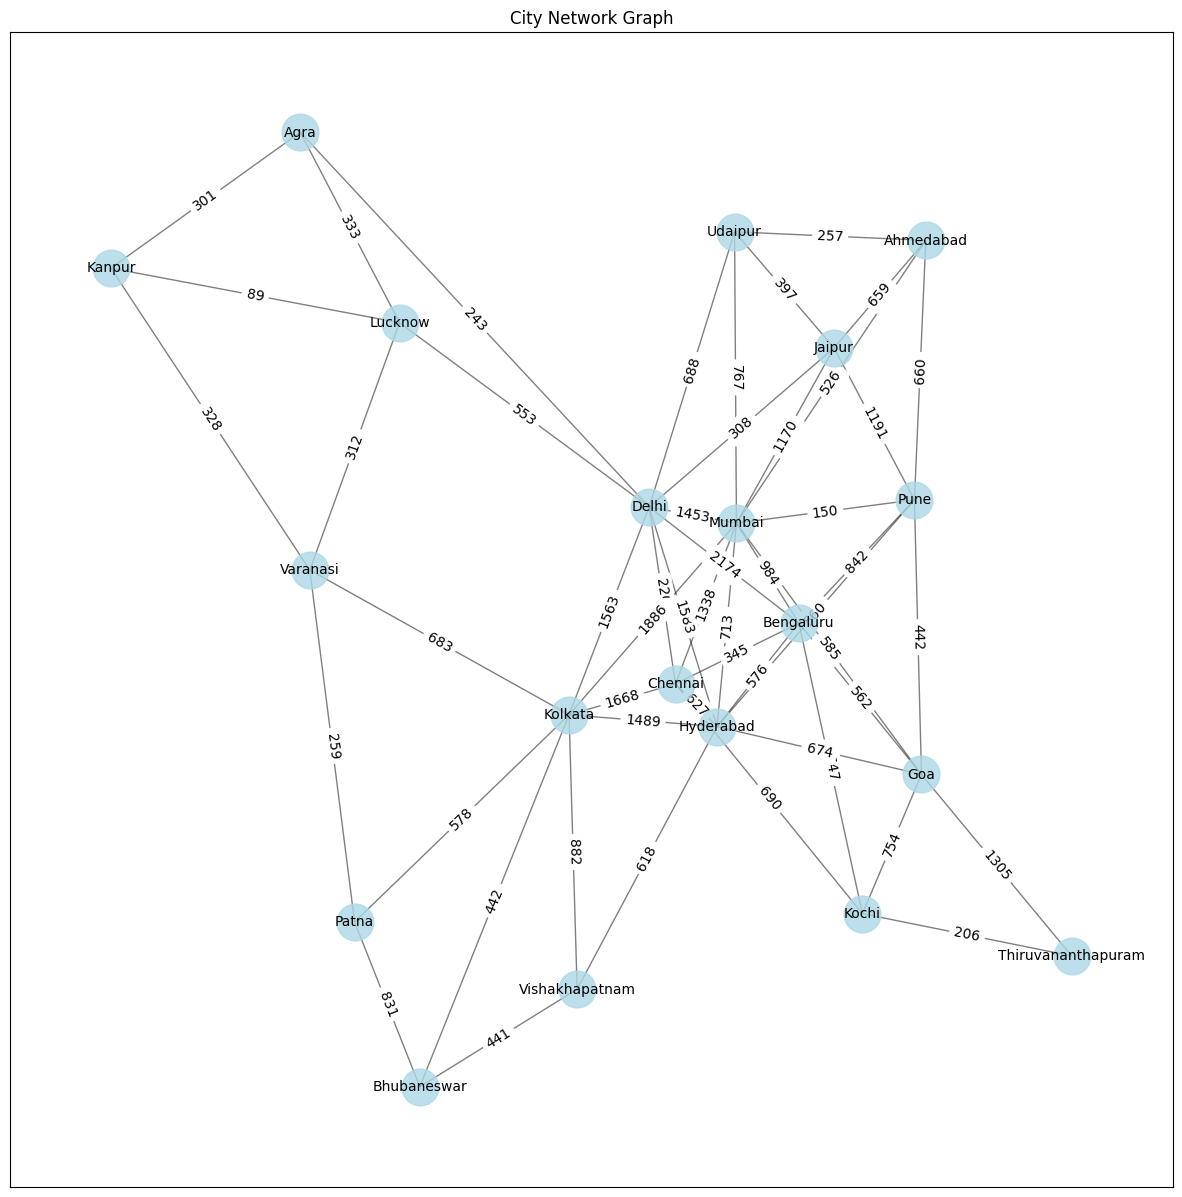

In [5]:
# Step 2: Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for layout

# Draw the graph with edge labels for distances
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Draw edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("City Network Graph")
plt.show()

Using Node2vec

In [6]:
!pip install node2vec

In [7]:
from node2vec import Node2Vec

# Create a node2vec model
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Fit the model
model = node2vec.fit(window=10, min_count=1, sg=1)

# Save embeddings
model.wv.save_word2vec_format('embeddings.emb')


Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

Using Word2Vec

In [13]:
!pip install networkx gensim pandas


In [15]:
import pandas as pd
import networkx as nx
from gensim.models import Word2Vec
import random

In [16]:
def generate_walks(graph, num_walks=200, walk_length=30):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = [node]
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(walk[-1]))
                if not neighbors:
                    break
                next_node = random.choice(neighbors)
                walk.append(next_node)
            walks.append(walk)
    return walks

# Generate walks from the graph
walks = generate_walks(G)

# Convert walks to the format required by Word2Vec
sentences = [[str(node) for node in walk] for walk in walks]

# Train Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=64, window=10, min_count=1, sg=1)

# Save embeddings
model.save('word2vec_embeddings.model')

Number of embeddings: 20


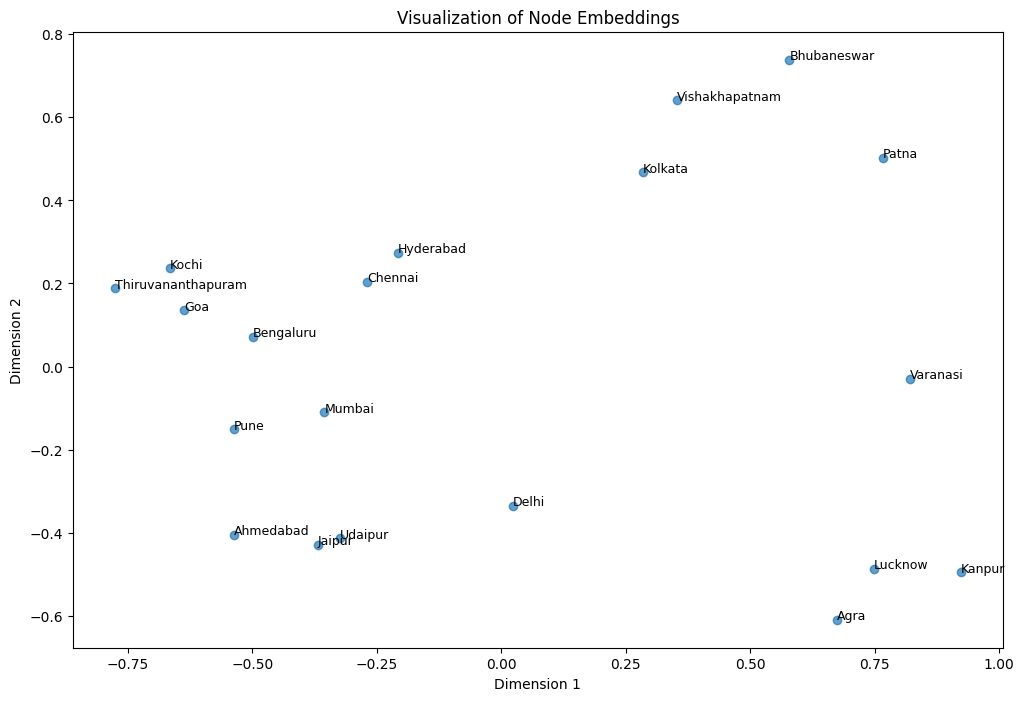

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load the Word2Vec model
model = Word2Vec.load('word2vec_embeddings.model')

# Extract embeddings
embeddings = model.wv[model.wv.index_to_key]

# Check number of embeddings
num_embeddings = len(model.wv.index_to_key)
print("Number of embeddings:", num_embeddings)

# Reduce dimensions with t-SNE or PCA
if num_embeddings > 30:
    # Use t-SNE with adjusted perplexity
    perplexity_value = min(30, num_embeddings - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
else:
    # Use PCA if t-SNE is not suitable
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
for i, word in enumerate(model.wv.index_to_key):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=9)
plt.title('Visualization of Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


The plot  is a 2D visualization of node embeddings, which are likely derived from a graph structure. Node embeddings represent nodes (in this case, cities) in a continuous vector space, where the position of each node reflects its structural properties and relationships with other nodes.

### Interpretation:
1. **Clusters and Grouping**:
   - The cities are spread across the 2D space, with some forming clusters or groups. For example, cities like **Kochi**, **Thiruvananthapuram**, **Goa**, and **Bengaluru** are close to each other, indicating that they might have similar structural roles or relationships in the underlying graph.
   - Similarly, cities like **Lucknow**, **Kanpur**, and **Agra** are also grouped together, suggesting they share common attributes.

2. **Isolated Nodes**:
   - Some cities, like **Varanasi** and **Visakhapatnam**, are more isolated in the plot. This might indicate that they have unique structural characteristics or are less connected to other nodes.

3. **Dimension Axes**:
   - The axes labeled "Dimension 1" and "Dimension 2" represent the reduced dimensions obtained through techniques like PCA, t-SNE, or UMAP. These dimensions don’t have a direct physical interpretation but are used to capture the essence of the high-dimensional embedding space.

4. **Potential Insights**:
   - Cities close to each other might have similar patterns of connectivity or roles in the network, which could be useful for making predictions or gaining insights into the structure of the graph.

